In [3]:
# The goal of this project is to visualize attributes in the csv file to see which one have a high correlation with income level 
# Income level is divided into two groups <=50K and >50K
# As part of a group of 6, I was tasked to create bar graphs for attributes education, occupation and sex
# Other team members are responsible for creating other types of graphs for other attributes
# Together we were able to decide the top 4 attributes best predictor for income level
# The result shows that education is the best predictor for income level
# Further sesult is under system documentation file and executive report file


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

In [20]:
# connect to database
conn = sqlite3.connect('adult.db')
c = conn.cursor()

# Retrieve education attribute data from database table and order by lowest to highest number of education (column e)
# Education data for people with income <= 50k
c.execute("SELECT d, COUNT(d) AS education FROM adult_table WHERE o LIKE '%<=%' GROUP BY d ORDER BY e")
ed_data_below50 = c.fetchall()
db0 = pd.DataFrame.from_records(ed_data_below50, columns=["Name","Count"])
# Education data for people with income > 50k
c.execute("SELECT d, COUNT(d) AS education FROM adult_table WHERE o LIKE '%>%' GROUP BY d ORDER BY e")
ed_data_above50 = c.fetchall()
db1 = pd.DataFrame.from_records(ed_data_above50, columns=["Name","Count"])

# Retrieve occupation attribute data from database table
# Occupation data for people with income <= 50k
c.execute("SELECT g, COUNT(g) AS occupation FROM adult_table WHERE o LIKE '%<=%' GROUP BY g ORDER BY occupation ASC")
oc_data_below50 = c.fetchall()
db2 = pd.DataFrame.from_records(oc_data_below50, columns=["Name","Count"])
# Occupation data for people with income > 50k
c.execute("SELECT g, COUNT(g) AS occupation FROM adult_table WHERE o LIKE '%>%' GROUP BY g ORDER BY occupation ASC")
oc_data_above50 = c.fetchall()
db3 = pd.DataFrame.from_records(oc_data_above50, columns=["Name","Count"])

# Retrieve sex attribute data from database table
# Sex data for people with income <= 50k
c.execute("SELECT j, COUNT(j) AS sex FROM adult_table WHERE o LIKE '%<=%' GROUP BY j")
sex_data_below50 = c.fetchall()
db4 = pd.DataFrame.from_records(sex_data_below50, columns=["Name","Count"])
# Sex data for people with income > 50k
c.execute("SELECT j, COUNT(j) AS sex FROM adult_table WHERE o LIKE '%>%' GROUP BY j")
sex_data_above50 = c.fetchall()
db5 = pd.DataFrame.from_records(sex_data_above50, columns=["Name","Count"])


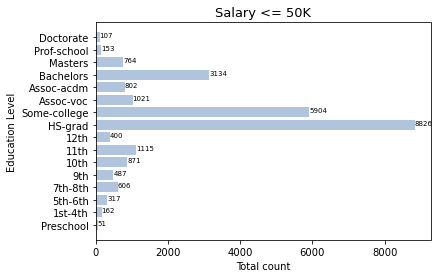

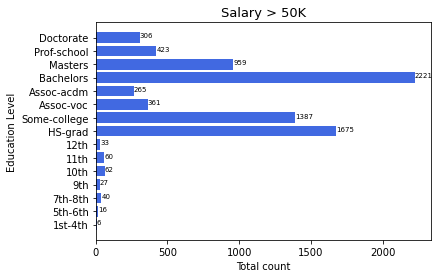

In [14]:
# Education
# Create education bar chart for salary/income <=50K
plt.barh(db0['Name'], db0['Count'],color=['lightsteelblue'])
plt.title('Salary <= 50K', fontsize=13)
plt.ylabel('Education Level', fontsize=10)
plt.xlabel('Total count', fontsize=10)
for index, value in enumerate(db0['Count']):
    plt.text(value, index, str(value), fontsize = 7)
plt.savefig('Ed1.png',bbox_inches='tight',dpi=300)
plt.show()

# Create education bar chart for salary/income >50K
plt.barh(db1['Name'], db1['Count'],color=['royalblue'])
plt.title('Salary > 50K', fontsize=13)
plt.ylabel('Education Level', fontsize=10)
plt.xlabel('Total count', fontsize=10)
for index, value in enumerate(db1['Count']):
    plt.text(value, index, str(value), fontsize = 7)
plt.savefig('Ed2.png',bbox_inches='tight',dpi=300)
plt.show()

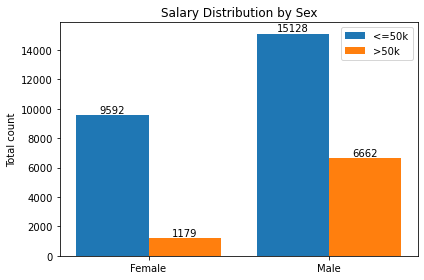

In [6]:
# Create bar chart for attribute sex
x = np.arange(len(db4['Name']))
width = 0.4
fig, ax = plt.subplots()
r1 = ax.bar(x-width/2, db4['Count'], width, label = "<=50k")
r2 = ax.bar(x+width/2, db5['Count'], width, label = ">50k")
ax.set_title('Salary Distribution by Sex')
ax.set_xticks(x)
ax.set_ylabel('Total count', fontsize=10)
ax.set_xticklabels(db4['Name'])
ax.legend()


def autolabels(rr):
    for r in rr:
        h = r.get_height()
        ax.text(r.get_x() + r.get_width()/2, h, int(h),
                ha='center', va='bottom')
        
autolabels(r1)
autolabels(r2)

fig.tight_layout()
plt.savefig('sex.png',bbox_inches='tight',dpi=300)
plt.show()

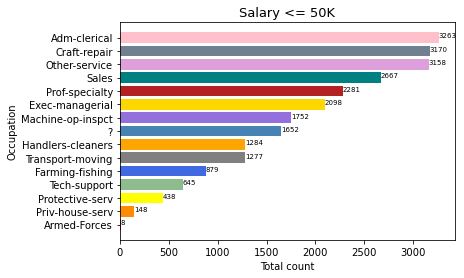

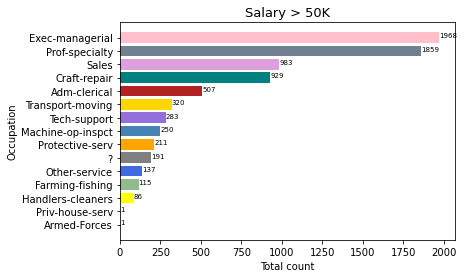

In [21]:
# Create occupation bar charts 
plt.barh(db2['Name'], db2['Count'], color = ['red','darkorange','yellow','darkseagreen','royalblue',
                                            'grey','orange','steelblue','mediumpurple','gold',
                                            'firebrick','teal','plum','slategrey','pink'])
plt.title('Salary <= 50K', fontsize=13)
plt.ylabel('Occupation', fontsize=10)
plt.xlabel('Total count', fontsize=10)

for index, value in enumerate(db2['Count']):
    plt.text(value, index, str(value), fontsize = 7)
plt.savefig('occupation1.png',bbox_inches='tight',dpi=300)
plt.show()

plt.barh(db3['Name'], db3['Count'], color = ['red','darkorange','yellow','darkseagreen','royalblue',
                                            'grey','orange','steelblue','mediumpurple','gold',
                                            'firebrick','teal','plum','slategrey','pink'])
plt.title('Salary > 50K', fontsize=13)
plt.ylabel('Occupation', fontsize=10)
plt.xlabel('Total count', fontsize=10)
for index, value in enumerate(db3['Count']):
    plt.text(value, index, str(value), fontsize = 7)
plt.savefig('occupation2.png',bbox_inches='tight',dpi=300)
plt.show()